# Genetic Algorithm Demo

## TicTacToe

In [27]:
from games import TTT as TicTacToe
from agents import AlphaBetaAgent, RandomAgent
from tqdm import trange
import numpy as np

def tic_tac_toe_fitness_function(strategy, weights, opp_strategy='random', opp_weights=[], episodes=10):
    wins = 0
    
    for i in range(episodes):

        game = TicTacToe()
        smartAgent = np.random.choice([-1, 1])
        if smartAgent == 1:
            agent1 = AlphaBetaAgent(upper_lim=100, lower_lim=-100, max_depth=3,
                                    max_player='x', strategy=strategy, weights=weights)
            if opp_strategy == 'random':
                agent2 = RandomAgent()
            else:
                agent2 = AlphaBetaAgent(upper_lim=100, lower_lim=-100, max_depth=3,
                                        max_player='x', strategy=opp_strategy, weights=opp_weights)
        else:
            if opp_strategy == 'random':
                agent1 = RandomAgent()
            else:
                agent1 = AlphaBetaAgent(upper_lim=100, lower_lim=-100, max_depth=3,
                                        max_player='x', strategy=opp_strategy, weights=opp_weights)
            agent2 = AlphaBetaAgent(upper_lim=100, lower_lim=-100, max_depth=3,
                                    max_player='x', strategy=strategy, weights=weights)



        done = False
        a1_turn = True
        while not game.is_terminal():
            game, reward = agent1.find_opt_move(game, game.p1) if a1_turn else agent2.find_opt_move(game, game.p2)
            a1_turn = not a1_turn

        wins += 1 if smartAgent*game.eval(1, 1) == 100 else 0

    return wins/episodes

In [28]:
from geneal.genetic_algorithms import ContinuousGenAlgSolver
from geneal.applications.fitness_functions.continuous import fitness_functions_continuous

def run_genetic_algorithm(num_genes, strategy, opp_strategy, opp_weights, episodes):
    solver = ContinuousGenAlgSolver(
        n_genes=num_genes, 
        fitness_function=lambda weights: tic_tac_toe_fitness_function(
            strategy, weights, opp_strategy, opp_weights, episodes),
        pop_size=10,
        max_gen=100,
        mutation_rate=0.1,
        selection_rate=0.6,
        selection_strategy="roulette_wheel",
        problem_type=float, # Defines the possible values as float numbers
        variables_limits=(-1, 1) # Defines the limits of all variables between -10 and 10. 
                                   # Alternatively one can pass an array of tuples defining the limits
                                   # for each variable: [(-10, 10), (0, 5), (0, 5), (-20, 20)]
    )

    solver.solve()

### AlphaBeta vs Random (Open Wins Strategy)

Iteration: 10
Best fitness: 0.82
Iteration: 20
Best fitness: 0.84
Iteration: 30
Best fitness: 0.86
Iteration: 40
Best fitness: 0.87
Iteration: 50
Best fitness: 0.87
Iteration: 60
Best fitness: 0.87
Iteration: 70
Best fitness: 0.87
Iteration: 80
Best fitness: 0.87
Iteration: 90
Best fitness: 0.89
Iteration: 100
Best fitness: 0.89


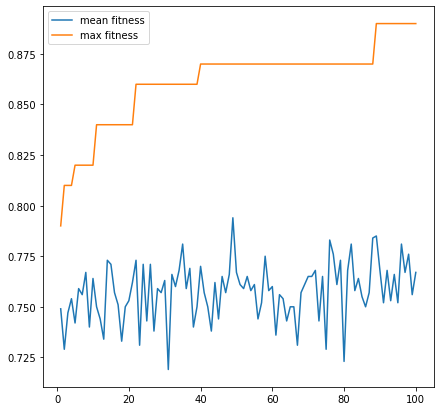


#############################
#			STATS			#
#############################


Total running time: 4 minutes, 45 seconds


Population size: 10
Number variables: 8
Selection rate: 0.6
Mutation rate: 0.1
Number Generations: 100

Best fitness: 0.89
Best individual: [-0.4934769   0.57044109 -0.99484066  0.63858261  0.31336081  0.45081333
  0.30694799 -0.80984859]


In [42]:
run_genetic_algorithm(8, 'weighted_open_wins', 'random', [], 100)

In [46]:
s='-0.4934769   0.57044109 -0.99484066  0.63858261  0.31336081  0.45081333 0.30694799 -0.80984859'
print([float(e) for e in s.split()])

[-0.4934769, 0.57044109, -0.99484066, 0.63858261, 0.31336081, 0.45081333, 0.30694799, -0.80984859]


In [49]:
tic_tac_toe_fitness_function(strategy='weighted_open_wins', 
                             weights=[-0.4934769, 0.57044109, -0.99484066, 0.63858261, 0.31336081, 0.45081333, 0.30694799, -0.80984859],
                             opp_strategy='random', 
                             opp_weights=[], episodes=1000)

0.741

### AlphaBeta vs Random (Captured Strategy)

Iteration: 10
Best fitness: 0.8
Iteration: 20
Best fitness: 0.84
Iteration: 30
Best fitness: 0.84
Iteration: 40
Best fitness: 0.84
Iteration: 50
Best fitness: 0.84
Iteration: 60
Best fitness: 0.84
Iteration: 70
Best fitness: 0.84
Iteration: 80
Best fitness: 0.84
Iteration: 90
Best fitness: 0.84
Iteration: 100
Best fitness: 0.84


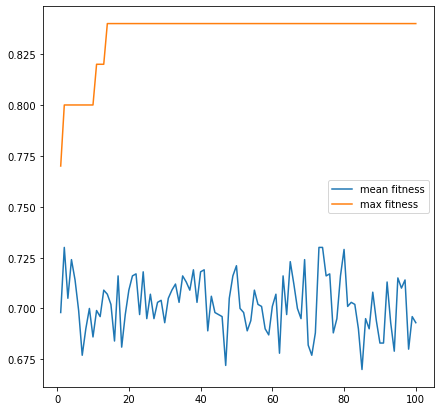


#############################
#			STATS			#
#############################


Total running time: 4 minutes, 45 seconds


Population size: 10
Number variables: 9
Selection rate: 0.6
Mutation rate: 0.1
Number Generations: 100

Best fitness: 0.84
Best individual: [-0.53357264  0.47397783 -0.03415826 -0.14857959  0.18172612 -0.53565504
 -0.93626452  0.01047905  0.28088992]


In [43]:
run_genetic_algorithm(9, 'weighted_captured', 'random', [], 100)

In [47]:
s='-0.53357264  0.47397783 -0.03415826 -0.14857959  0.18172612 -0.53565504 -0.93626452 0.01047905 0.28088992'
print([float(e) for e in s.split()])

[-0.53357264, 0.47397783, -0.03415826, -0.14857959, 0.18172612, -0.53565504, -0.93626452, 0.01047905, 0.28088992]


In [50]:
tic_tac_toe_fitness_function(strategy='weighted_captured', 
                             weights=[-0.53357264, 0.47397783, -0.03415826, -0.14857959, 0.18172612, -0.53565504, -0.93626452, 0.01047905, 0.28088992],
                             opp_strategy='random', 
                             opp_weights=[], episodes=1000)

0.674

### AlphaBeta vs AlphaBeta (Open Wins Strategy)

Iteration: 10
Best fitness: 0.62
Iteration: 20
Best fitness: 0.62
Iteration: 30
Best fitness: 0.62
Iteration: 40
Best fitness: 0.62
Iteration: 50
Best fitness: 0.62
Iteration: 60
Best fitness: 0.62
Iteration: 70
Best fitness: 0.65
Iteration: 80
Best fitness: 0.65
Iteration: 90
Best fitness: 0.65
Iteration: 100
Best fitness: 0.65


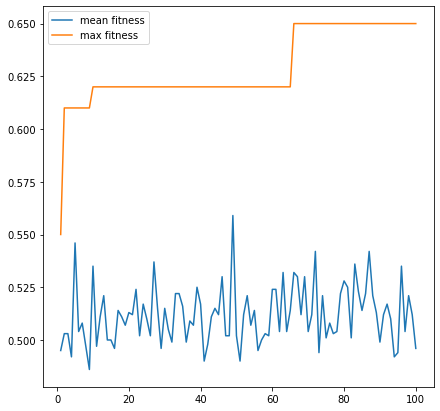


#############################
#			STATS			#
#############################


Total running time: 8 minutes, 53 seconds


Population size: 10
Number variables: 8
Selection rate: 0.6
Mutation rate: 0.1
Number Generations: 100

Best fitness: 0.65
Best individual: [ 0.65380243 -0.89019624  0.61315058 -0.69967952  0.36925554 -0.325274
 -0.25419074 -0.5932524 ]


In [44]:
run_genetic_algorithm(8, 'weighted_open_wins', 'open_wins', [], 100)

In [48]:
s='0.65380243 -0.89019624  0.61315058 -0.69967952  0.36925554 -0.325274 -0.25419074 -0.5932524'
print([float(e) for e in s.split()])

[0.65380243, -0.89019624, 0.61315058, -0.69967952, 0.36925554, -0.325274, -0.25419074, -0.5932524]


In [51]:
tic_tac_toe_fitness_function(strategy='weighted_open_wins', 
                             weights=[0.65380243, -0.89019624, 0.61315058, -0.69967952, 0.36925554, -0.325274, -0.25419074, -0.5932524],
                             opp_strategy='open_wins', 
                             opp_weights=[], episodes=1000)

0.491

### AlphaBeta vs AlphaBeta (Captured Strategy)

Iteration: 10
Best fitness: 0.76
Iteration: 20
Best fitness: 0.76
Iteration: 30
Best fitness: 0.76
Iteration: 40
Best fitness: 0.76
Iteration: 50
Best fitness: 0.76
Iteration: 60
Best fitness: 0.77
Iteration: 70
Best fitness: 0.77
Iteration: 80
Best fitness: 0.77
Iteration: 90
Best fitness: 0.77
Iteration: 100
Best fitness: 0.77


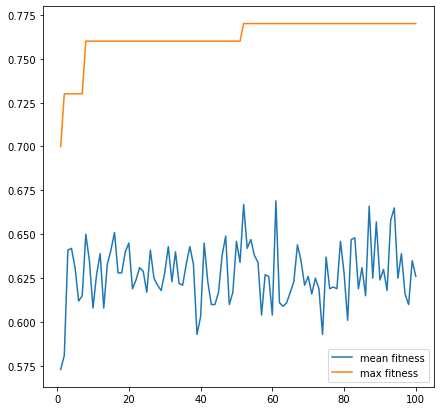


#############################
#			STATS			#
#############################


Total running time: 8 minutes, 49 seconds


Population size: 10
Number variables: 9
Selection rate: 0.6
Mutation rate: 0.1
Number Generations: 100

Best fitness: 0.77
Best individual: [-0.93377499 -0.30342452  0.01588927  0.91480689  0.55933535 -0.69210967
 -0.01514477  0.18072414  0.39527845]


In [45]:
run_genetic_algorithm(9, 'weighted_captured', 'captured', [], 100)

In [52]:
s='-0.93377499 -0.30342452  0.01588927  0.91480689  0.55933535 -0.69210967 -0.01514477  0.18072414  0.39527845'
print([float(e) for e in s.split()])

[-0.93377499, -0.30342452, 0.01588927, 0.91480689, 0.55933535, -0.69210967, -0.01514477, 0.18072414, 0.39527845]


In [53]:
tic_tac_toe_fitness_function(strategy='weighted_captured', 
                             weights=[-0.93377499, -0.30342452, 0.01588927, 0.91480689, 0.55933535, -0.69210967, -0.01514477, 0.18072414, 0.39527845],
                             opp_strategy='captured', 
                             opp_weights=[], episodes=1000)

0.587